# Thest the Simple atmospheric transparency Emulator

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/02/10
- last update : 2023/02/10


This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

In [1]:
import numpy as np
import pandas as pd
import os
from scipy import interpolate
from astropy.io import fits
from astropy.table import Table
import seaborn as sns
import copy

In [14]:
from simpleatmospherictransparencyemulator import SimpleAtmEmulator,find_data_path

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [4]:
from libradtranpy import  libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
FLAG_CHECKWITHLIBRADTRAN = False

In [7]:
AIRMASSMIN=1.0
AIRMASSMAX=2.6
DAM = 0.2
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)
NAM=len(airmasses)

In [8]:
PWVMIN = 0
PWVMAX = 11
DPWV = 0.5
pwvs = np.arange(PWVMIN,PWVMAX,DPWV)
NPWV = len(pwvs)

In [9]:
pwvs

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])

In [10]:
OZMIN = 0
OZMAX = 600
DOZ   = 50
ozs = np.arange(OZMIN,OZMAX,DOZ)
NOZ = len(ozs)

In [11]:
ozs

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

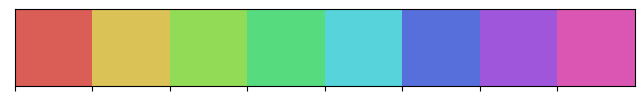

In [12]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

# Check emulator

In [15]:
path_data =  find_data_path()  
emul = SimpleAtmEmulator(path_data)

relativ data path  /../data/finegrid
abspath =  /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator
realpath =  /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator
syspath =  /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator
dirname =  /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator
found data file /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator/../data/finegrid/atmospherictransparencygrid_params_training.pickle
found data file /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator/../data/finegrid/atmospherictransparencygrid_params_test.pickle
found data file /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator/../data/finegrid/atmospherictransparencygrid_rayleigh_training.npy
found data file /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator/../data/finegrid/atmospherictransparencygrid_rayleigh_test.npy
found data file /Users/dagoret/MacOSX/GitHub/LSST/AtmEmulator/SimpleEmulator/../data/finegrid/atmospheri

emul.WL

In [ ]:
WL = emul.GetWL()

## Check emulator with Rayleigh scattering

In [ ]:
for idx,am in enumerate(airmasses):

    transm = emul.GetRayleighTransparencyArray(WL,am)
    plt.plot(WL,transm,color=hls_colors[idx])

## Check emulator with Oxygen O2 absorption

In [ ]:
for idx,am in enumerate(airmasses):

    transm = emul.GetO2absTransparencyArray(WL,am)
    plt.plot(WL,transm,color=hls_colors[idx])
plt.yscale('log')

## Check emulator with PWV absorption

In [ ]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

In [ ]:
for idx,pwv in enumerate(pwvs):

    transm = emul.GetPWVabsTransparencyArray(WL,am,pwv)
    plt.plot(WL,transm,color=hls_colors[idx])

## Check emulator with Ozone absorption

In [ ]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

In [ ]:
for idx,oz in enumerate(ozs):

    transm = emul.GetOZabsTransparencyArray(WL,am,oz)
    plt.plot(WL,transm,color=hls_colors[idx])

## Check emulator with combined ascattering and absorption process and check with libradtran

In [ ]:
am0 = 1.0
pwv0 = 5.0
oz0 = 500.
transm1 = emul.GetGriddedTransparencies(WL,am0,pwv0,oz0,flagRayleigh=True)
label0=f"emulator : airmass = {am0:.2f}, pwv  = {pwv0:.2f} mm , oz = {oz0:.1f} DU"

In [ ]:
am1 = 2.0
pwv1 = 5.0
oz1 = 500.
transm2 = emul.GetGriddedTransparencies(WL,am1,pwv1,oz1,flagRayleigh=True)
label1=f"emulator : airmass = {am1:.2f},  pwv  = {pwv1:.2f} mm , oz = {oz1:.1f} DU"

In [ ]:
plt.figure(figsize=(14,8))

plt.plot(WL,transm1,'b-',label=label0)
plt.plot(WL,transm2,'r-',label=label1)
plt.legend()

In [ ]:
if FLAG_CHECKWITHLIBRADTRAN:
    path,thefile = libsimulateVisible.ProcessSimulation(am0,pwv0,oz0,0,prof_str='us',proc_str='sa',cloudext=0.0, FLAG_VERBOSE=False)
    data1 = np.loadtxt(os.path.join(path,thefile))
    path,thefile = libsimulateVisible.ProcessSimulation(am1,pwv1,oz1,0,prof_str='us',proc_str='sa',cloudext=0.0, FLAG_VERBOSE=False)
    data2 = np.loadtxt(os.path.join(path,thefile))

In [ ]:
if FLAG_CHECKWITHLIBRADTRAN:
    plt.figure(figsize=(14,8))
    plt.plot(WL,transm1,'b-',label=label0)
    plt.plot(data1[:,0],data1[:,1],'k:',label="librandtran")
    plt.plot(WL,transm2,'r-',label=label1)
    plt.plot(data2[:,0],data2[:,1],'k-.',label="libradtran")
    plt.legend()

## Check with aerosols

In [ ]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

In [ ]:
ncomp=0

for idx,am in enumerate(airmasses):

    transm = emul.GetAerosolsTransparencies(WL,am,ncomp)
    plt.plot(WL,transm,color=hls_colors[idx])
    
plt.ylim(0,1.1)

In [ ]:
taus = [0.05, 0.01]
betas = [- 1.0, -2]
ncomp=2

for idx,am in enumerate(airmasses):

    transm = emul.GetAerosolsTransparencies(WL,am,ncomp,taus,betas)
    plt.plot(WL,transm,color=hls_colors[idx])
    
plt.ylim(0,1)

In [ ]:
all_taus = [0.01, 0.05, 0.1]
betas = [- 1.0]
ncomp=1
am=1

NTAUS = len(all_taus)

hls_colors = sns.color_palette("hls", NTAUS)
sns.palplot(hls_colors)

In [ ]:
for idx,tau in enumerate(all_taus):
    taus = [tau]
    transm = emul.GetAerosolsTransparencies(WL,am,ncomp,taus,betas)
    plt.plot(WL,transm,color=hls_colors[idx])
    
plt.ylim(0,1)

## Test all combined transmission

In [ ]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

### Without aerosols

In [ ]:
pwv0 = 5.0
oz0 = 500.

for idx,am in enumerate(airmasses):

    transm = emul.GetAllTransparencies(WL,am,pwv0,oz0)
    plt.plot(WL,transm,color=hls_colors[idx])
    
plt.ylim(0,1)

### With aerosols

In [ ]:
wv0 = 5.0
oz0 = 500.
ncomp=1
taus= [0.02]
betas = [-1]

for idx,am in enumerate(airmasses):

    transm = emul.GetAllTransparencies(WL,am,pwv0,oz0,ncomp=ncomp, taus=taus, betas=betas, flagAerosols=True)
    transmnoaer = emul.GetAllTransparencies(WL,am,pwv0,oz0)
    plt.plot(WL,transm,color=hls_colors[idx])
    plt.plot(WL,transmnoaer,":",color=hls_colors[idx])
    
plt.ylim(0,1)